In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

# For creating dummy dataset
from sklearn.datasets import make_blobs, make_moons, make_circles, make_gaussian_quantiles, make_classification

In [2]:
class Perceptron:
    def __init__(self, include_bias=True):
        self.include_bias = include_bias
        
    def train(self, X, y, lr=1, max_epochs=10000):
        assert X.shape[0] == y.shape[0], 'Data and target count do not match'
        assert len(np.unique(y)) == 2, 'Targets cannot have more than 2 classes'
        self.misclassifications = [] # For plotting purposes
        
        # Add bias term if not included
        if self.include_bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        # Initialize weights
        self.weights = np.zeros((X.shape[1],))
        
        # To generalize to labels beyond -1/1
        # Can also accept 0/1 (or any other binary label) 
        # with the same expressions
        self.neg_value = np.min(y)
        self.pos_value = np.max(y)
        
        # Train and plot
        self.__sgd(X, y, lr, max_epochs)
        plt.plot(range(len(self.misclassifications)), self.misclassifications)
        
    def __sgd(self, X, y, lr, max_epochs):
        # For all epochs
        for epoch in tqdm(range(max_epochs)):
            n_misclassified = 0
            # For all examples in dataset
            for row, target in zip(X, y):
                # Predict class of data point
                pred = self.__predict(row)
                n_misclassified += not (pred == target)
                # Sign is 0 is correct prediction, +1 if false negative, -1 if false positive
                misclassified = 0 if (pred == target) else (1 if target == self.pos_value else -1)
                self.weights += lr * misclassified * row # Add obs if false negative, subtract if false positive
            
            self.misclassifications.append(n_misclassified)
            if (n_misclassified == 0):
                break
            
    def __get_class(self, x):
        return self.pos_value if x > 0 else self.neg_value
        
    def __predict(self, X):
        y = np.dot(X, self.weights)
        return self.__get_class(y)
    
    def predict(self, X):
        if self.include_bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        y = np.dot(X, self.weights)
        return np.array(list(map(self.get_class, prod))).reshape(y.shape)

### Uncomment to get different dataset geometries

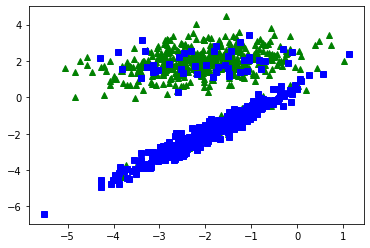

In [3]:
# Perfectly linearly separable most of the times
# X, y = datasets.make_blobs(n_samples=1000, centers=2, n_features=2, center_box=(0, 10))

# X, y = make_moons(n_samples=1000, noise=0.1) # Not linearly separable

# X, y = make_circles(n_samples=1000, noise=0.05) # Not linearly separable

# X, y = make_gaussian_quantiles(cov=3.,n_samples=1000, n_features=2, n_classes=2) # Not linearly separable

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, 
                           n_repeated=0, n_classes=2, n_clusters_per_class=1,class_sep=2,
                           flip_y=0.2,weights=[0.5,0.5]) # Almost linear separable, high noise

plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

  0%|          | 0/10000 [00:00<?, ?it/s]

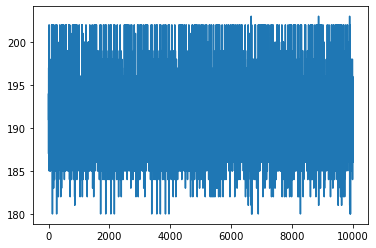

In [4]:
p = Perceptron()
p.train(X, y)

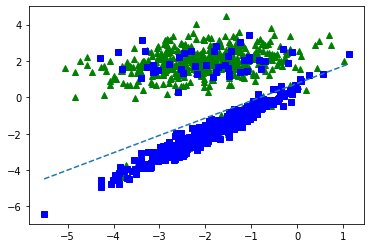

In [5]:
minimum = np.min(X[:, 0])
maximum = np.max(X[:, 0])
y_line = []
x_line = np.linspace(minimum, maximum, 1000)
for x_l in x_line:
    y_line.append((-p.weights[0] * x_l - p.weights[2]) / p.weights[1])

plt.plot(X[:, 0][y == np.min(y)], X[:, 1][y == np.min(y)], 'g^')
plt.plot(X[:, 0][y == np.max(y)], X[:, 1][y == np.max(y)], 'bs')
plt.plot(x_line, y_line, '--')
plt.show()